<a href="https://colab.research.google.com/github/chakravartulavinay/my_practice_notes/blob/main/Copy_of_Capstone_Project(Hepatitis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statistics as st
import numpy as np

In [ ]:

null_values=["?",]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data',index_col=False,na_values=null_values,
                  names=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"],)



In [ ]:
df.shape

(155, 20)

In [ ]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


<Axes: >

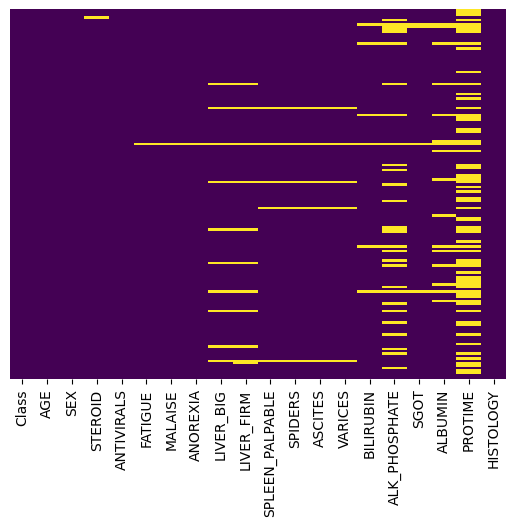

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

TypeError: ignored

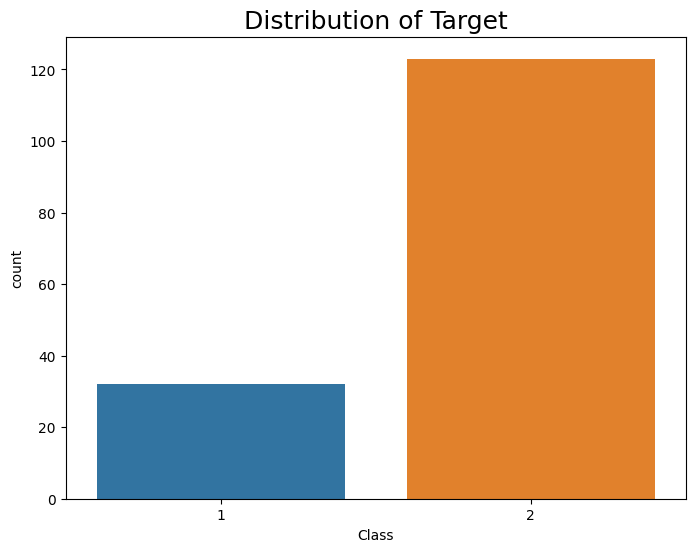

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=df['Class'])
xlabels=['Dead','Alive']
target_count=df.Class.value_counts()
plt.annotate(s=target_count[1], xy=(-0.04,10+target_count[1]), size=14)
plt.annotate(s=target_count[2], xy=(0.96,10+target_count[2]), size=14)
plt.ylim(0,150)
plt.xticks([0,1],xlabels)
plt.show()

In [ ]:

plt.pie(df['Class'].value_counts(),labels=["Alive","Dead"],autopct='%1.1f%%')

In [ ]:
plt.pie(df['SEX'].value_counts(),labels=["Male","Female"],autopct='%1.1f%%')

In [ ]:
df['Class'].value_counts()

In [ ]:
#Ratio of null values
df.isnull().sum()/df.shape[0]*100

In [ ]:
df.drop("PROTIME", axis = 1, inplace=True)
df["VARICES"]=df["VARICES"].fillna(st.mode(df["VARICES"]))
df["ASCITES"]=df["ASCITES"].fillna(st.mode(df["ASCITES"]))
df["SPIDERS"]=df["SPIDERS"].fillna(st.mode(df["SPIDERS"]))
df["SPLEEN_PALPABLE"]=df["SPLEEN_PALPABLE"].fillna(st.mode(df["SPLEEN_PALPABLE"]))
df["LIVER_FIRM"]=df["LIVER_FIRM"].fillna(st.mode(df["LIVER_FIRM"]))
df["LIVER_BIG"]=df["LIVER_BIG"].fillna(st.mode(df["LIVER_BIG"]))
df["ANOREXIA"]=df["ANOREXIA"].fillna(st.mode(df["ANOREXIA"]))
df["MALAISE"]=df["MALAISE"].fillna(st.mode(df["MALAISE"]))
df["FATIGUE"]=df["FATIGUE"].fillna(st.mode(df["FATIGUE"]))
df["ANTIVIRALS"]=df["ANTIVIRALS"].fillna(st.mode(df["ANTIVIRALS"]))
df["STEROID"]=df["STEROID"].fillna(st.mode(df["STEROID"]))
#Using mean for these ones
df["BILIRUBIN"]=df["BILIRUBIN"].fillna(round(df["BILIRUBIN"].mean(),2))
df["ALK_PHOSPHATE"]=df["ALK_PHOSPHATE"].fillna(round(df["ALK_PHOSPHATE"].mean(),2))
df["SGOT"]=df["SGOT"].fillna(round(df["SGOT"].mean(),2))
df["ALBUMIN"]=df["ALBUMIN"].fillna(round(df["ALBUMIN"].mean(),2))

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='hot',annot=True)

In [ ]:
df['AGE_CAT'] = np.where(df.AGE >= 40, 2, 1)


In [ ]:
age = pd.DataFrame({'Class': df['Class'],
                   'AGE_CAT': df['AGE_CAT'],
                    'SEX':df['SEX']
                  })


In [ ]:
sns.heatmap(age.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
plt.pie(age['AGE_CAT'].value_counts(),labels=["Old","Young"],autopct='%1.1f%%')

In [ ]:
sym=pd.DataFrame({'Class': df['Class'],
                  'MALAISE':df['MALAISE'],
                  'FATIGUE':df['FATIGUE'],
                  'ANOREXIA':df['ANOREXIA']
                  })


In [ ]:
sns.heatmap(sym.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
meds=pd.DataFrame({'Class': df['Class'],
                  'STEROID':df['STEROID'],
                  'ANTIVIRALS':df['ANTIVIRALS']
                  })


In [ ]:
sns.heatmap(meds.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
phys=pd.DataFrame({'Class': df['Class'],
                  'VARICES':df['VARICES'],
                  'SPIDERS':df['SPIDERS'],
                  'SPLEEN_PALPABLE':df['SPLEEN_PALPABLE'],
                  'LIVER_FIRM':df['LIVER_FIRM'],
                  'LIVER_BIG':df['LIVER_BIG'],
                  'ASCITES':df['ASCITES']
                  })


In [ ]:
sns.heatmap(phys.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
report=pd.DataFrame({'Class': df['Class'],
                  'BILIRUBIN':df['BILIRUBIN'],
                  'ALK_PHOSPHATE':df['ALK_PHOSPHATE'],
                  'SGOT':df['SGOT'],
                  'ALBUMIN':df['ALBUMIN']
                  })


In [ ]:
sns.heatmap(report.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
df.isnull().sum()/df.shape[0] *100

In [ ]:
df.describe()

In [ ]:
df['Class'].value_counts()

In [ ]:
X = df.iloc[:,1:19]
y = df.iloc[:,0]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
df_unbalanced = pd.Series(y_train).value_counts().plot.bar()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
df_balanced = pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 45,max_iter=1000)
logreg.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
scoreDF = pd.DataFrame(columns=['accuracy','f1','recall',"roc_auc","type","balance"])

In [ ]:
from sklearn.model_selection import cross_val_score,cross_validate
score = cross_validate(logreg, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"Logistic Regression","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );
print(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean())
accuracy_score(y_test, y_pred)

In [ ]:
score = cross_validate(logreg, X_train_new, y_train_new, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"Logistic Regression","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );
print(cross_val_score(logreg, X_train_new, y_train_new, cv=10, scoring='accuracy').mean())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
score = cross_validate(knn, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, )
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())

In [ ]:
knn.fit(X_train_new,y_train_new)
knnpred = knn.predict(X_test)
score = cross_validate(knn, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(knn, X_train_new, y_train_new, cv=10, scoring='accuracy').mean())

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
score = cross_validate(svc, X_train, y_train, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy').mean())

In [ ]:
svc.fit(X_train_new, y_train_new)
svcpred = svc.predict(X_test)
score = cross_validate(svc, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(svc, X_train_new, y_train_new, cv=10, scoring='accuracy').mean())

In [ ]:
scoreDF

In [ ]:
sns.pairplot(df, x_vars=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN"], y_vars=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN"], size=7, aspect=0.7)

In [ ]:
scoreDF2 = pd.DataFrame(columns=['accuracy','f1','recall',"roc_auc","type","balance"])

In [ ]:
Class = age.iloc[:,0]
age = age.iloc[:,1:]
Class_train, Class_test, age_train, age_test = train_test_split(Class, age, test_size = 0.3, random_state = 0)

In [ ]:
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
score = cross_validate(svc, X_train, y_train, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy').mean())